In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Dataset description

In [2]:
# Loading the dataset
obesity_df = pd.read_csv(r'D:\Ashish\Studies\DSBA\Ignitus Internship\Project 1- EDA\Dataset\ObesityDataSet_raw_and_data_sinthetic (2) (1)\ObesityDataSet_raw_and_data_sinthetic.csv')
obesity_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Knowing the data

In [3]:
obesity_df.shape

(2111, 17)

In [4]:
obesity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

The dataset contains 2,111 records and 17 Features

### Data Dictionary

#### Attributes related with eating habits are:
- Frequent consumption of high caloric food (FAVC),
- Frequency of consumption of vegetables (FCVC),
- Number of main meals (NCP),
- Consumption of food between meals (CAEC),
- Consumption of water daily (CH20),
- Consumption of alcohol (CALC).

#### Attributes related with the physical condition are:
- Calories consumption monitoring (SCC),
- Physical activity frequency (FAF),
- Time using technology devices (TUE),
- Transportation used (MTRANS),

#### Other variables were:
Gender, Age, Height and Weight.

### Categorical Features

In [5]:
cat_features = []
for i in obesity_df.columns:
    if obesity_df[i].dtype == 'object':
        cat_features.append(i)
print(f'The dataset contains {len(cat_features)} Categorical features, which are: \n{cat_features}')

The dataset contains 9 Categorical features, which are: 
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


In [6]:
for i in cat_features:
    print(f'{i} has {obesity_df[i].nunique()} unique values. These values are:\n{obesity_df[i].unique()}')

Gender has 2 unique values. These values are:
['Female' 'Male']
family_history_with_overweight has 2 unique values. These values are:
['yes' 'no']
FAVC has 2 unique values. These values are:
['no' 'yes']
CAEC has 4 unique values. These values are:
['Sometimes' 'Frequently' 'Always' 'no']
SMOKE has 2 unique values. These values are:
['no' 'yes']
SCC has 2 unique values. These values are:
['no' 'yes']
CALC has 4 unique values. These values are:
['no' 'Sometimes' 'Frequently' 'Always']
MTRANS has 5 unique values. These values are:
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad has 7 unique values. These values are:
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


### Numerical Features

In [7]:
# For numerical features:
obesity_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


Key inferences:
- 75% of respondents are aged 26 or below.

In [38]:
obesity_df['TUE'].value_counts()

0.000000    537
1.000000    289
2.000000    108
0.630866      4
1.119877      3
           ... 
1.343044      1
1.019452      1
0.673408      1
0.997600      1
0.714137      1
Name: TUE, Length: 1129, dtype: int64

Inference:
- Features like 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE' have values which are categorical in nature, but for our purpose, we do not need to convert them into categorical datatype.

## Cleaning the data

### Spoiler: No missing values, but the data does contain duplicated values.

In [8]:
# Checking for nul values
obesity_df.isnull().sum().sum()

0

In [9]:
# Checking for duplicated values
obesity_df.duplicated().sum()

24

Since, duplicated values offer no value for our purpose, we may drop them. 

In [10]:
# Dropping duplicated values
obesity_df.drop_duplicates(inplace= True)

In [11]:
obesity_df.duplicated().sum()

0

In [12]:
# Checking general information about the dataset
obesity_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             20

Now, the dataset contains 2087 records after removing duplicated values

## Exploratory Data Analysis

In [13]:
# Taking out a sample of the dataset for reference
obesity_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [14]:
gender_dist_percent = (obesity_df['Gender'].value_counts(normalize= True))*100
print(f"{round(gender_dist_percent[0])}% of sample are Female and {round(gender_dist_percent[1])}% are males")

50% of sample are Female and 50% are males


Therefore, the dataset is balanced between genders

In [15]:
overweight_distn = obesity_df['family_history_with_overweight'].value_counts(normalize= True)*100
print(f"{round(overweight_distn[0])}% of sample is overweight and {round(overweight_distn[1])}% is not overweight")

83% of sample is overweight and 17% is not overweight


As we can see, majority of respondents are overweight.

In [16]:
trans_distn = obesity_df['MTRANS'].value_counts(normalize= True)*100
print('Distribution of mode of transport of the respondents (in %) is as follows:')
print(trans_distn)

Distribution of mode of transport of the respondents is as follows:
Public_Transportation    74.652611
Automobile               21.849545
Walking                   2.635362
Motorbike                 0.527072
Bike                      0.335410
Name: MTRANS, dtype: float64


In [17]:
# Mean weight of Girls vs Boys
obesity_df.groupby(['Gender'])['Weight'].mean()

Gender
Female    82.551078
Male      91.096771
Name: Weight, dtype: float64

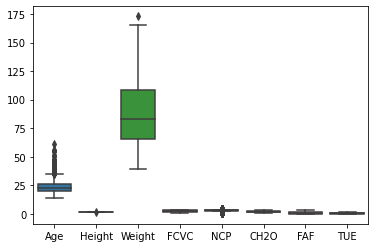

In [32]:
# Checking distribution of data in numerical features 
sns.boxplot(data = obesity_df);

The plot is not very clear because the scale of these features differ vastly. 'Weight' has values ranging in 100's, while features like 'FCVC', 'NCP, 'CH2O' has values ranging from 1.0 to 3.0. In order to solve above problem, we need to take a different approach.

In [33]:
# Making a list of all numerical features
num_feat = []
for i in obesity_df.columns:
    if obesity_df[i].dtype == 'int64' or obesity_df[i].dtype == 'float64':
        num_feat.append(i)
print(num_feat)

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


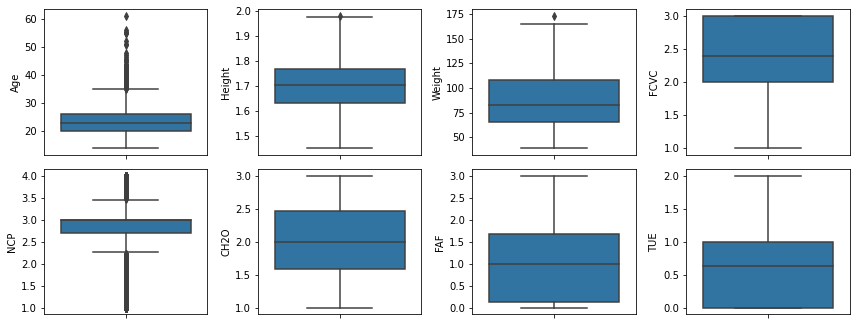

In [34]:
# Plotting boxplots to check distribution of numerical features
plt.figure(figsize= (12,9))
for i in range(len(num_feat)):
    plt.subplot(4,4, i+1)
    plt.title('Boxplot of all numerical features in the dataset')
    sns.boxplot(data= obesity_df, y = num_feat[i]);
    plt.tight_layout()

Inference:
- Weight & Height distribution are more or less normal.
- However, Age distribution shows that majority of respondents are aged 30 yrs or less. 

#### Checking for distribution of weight between both genders

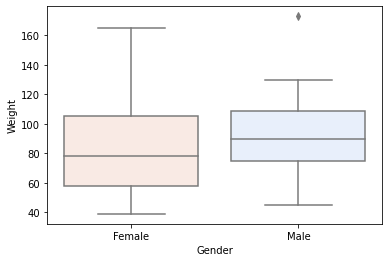

In [20]:
ax = sns.boxplot(data = obesity_df, x = "Gender", y = "Weight", palette= "coolwarm_r")
for patch in ax.artists:
    r, b, g, a = patch.get_facecolor()
    patch.set_facecolor((r, b, g, 0.3))
plt.show()

#### Checking for distribution of weight of respondents according to the mode of transport they use

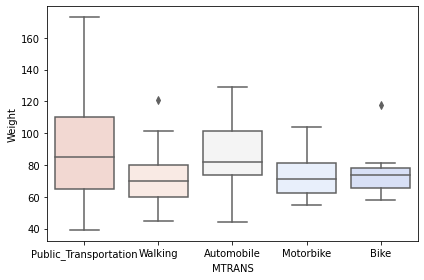

In [34]:
ax = sns.boxplot(data = obesity_df, x = "MTRANS", y = "Weight", palette= "coolwarm_r")
for patch in ax.artists:
    r, b, g, a = patch.get_facecolor()
    patch.set_facecolor((r, b, g, 0.3))
plt.tight_layout()

From the above plot, we can infer that the respondents who use modes of transport such as Public Transport or Automobile have more weights than those who use Walking, Bike or Motorbikes as modes of transport.

#### Checking for weight distribution of respondents according to their family history with overweight 

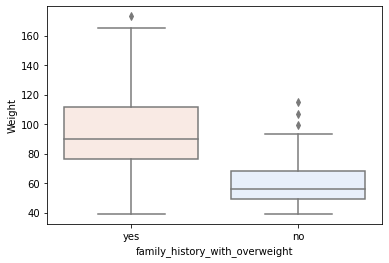

In [22]:
ax = sns.boxplot(data = obesity_df, x = "family_history_with_overweight", y = "Weight", palette= "coolwarm_r")
for patch in ax.artists:
    r, b, g, a = patch.get_facecolor()
    patch.set_facecolor((r, b, g, 0.3))
plt.show()

Inference:
- Respondents with family history generally have more weight. 

#### Checking for distribution of weight acoording to the respondents' smoking habits

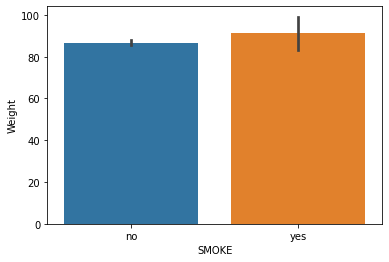

In [39]:
sns.barplot(data= obesity_df, x = 'SMOKE', y = 'Weight');

As we can see, there is no significant difference between wights of smokers and non-smokers.

#### Checking for relationship between Obesity and Use of technology

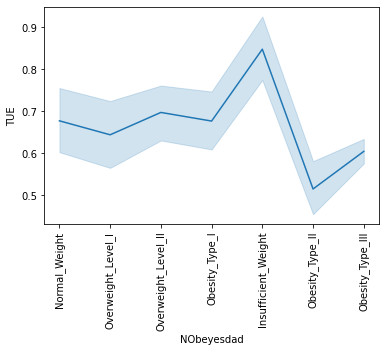

In [44]:
sns.lineplot(data= obesity_df, x = 'NObeyesdad', y = 'TUE')
plt.xticks(rotation= 90)
plt.show()

Inference:
- Insufficient weight is highest when use of technology is highest.
- Highest levels of obesity are displayed when use of technology is very low.

### Checking for correlation

#### Heatmap

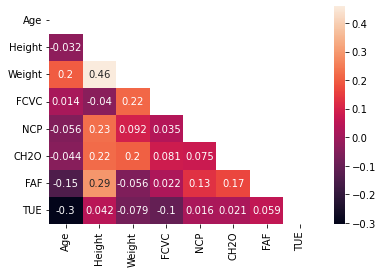

In [35]:

sns.heatmap(obesity_df.corr(), annot= True, mask= np.triu(obesity_df.corr()));

Inference:
- Above plot shows that there is no significant correlation between the numerical features of the dataset.
- However, these is some correlation between 'Height' & 'Weight', which was expected.

#### Pairplot 

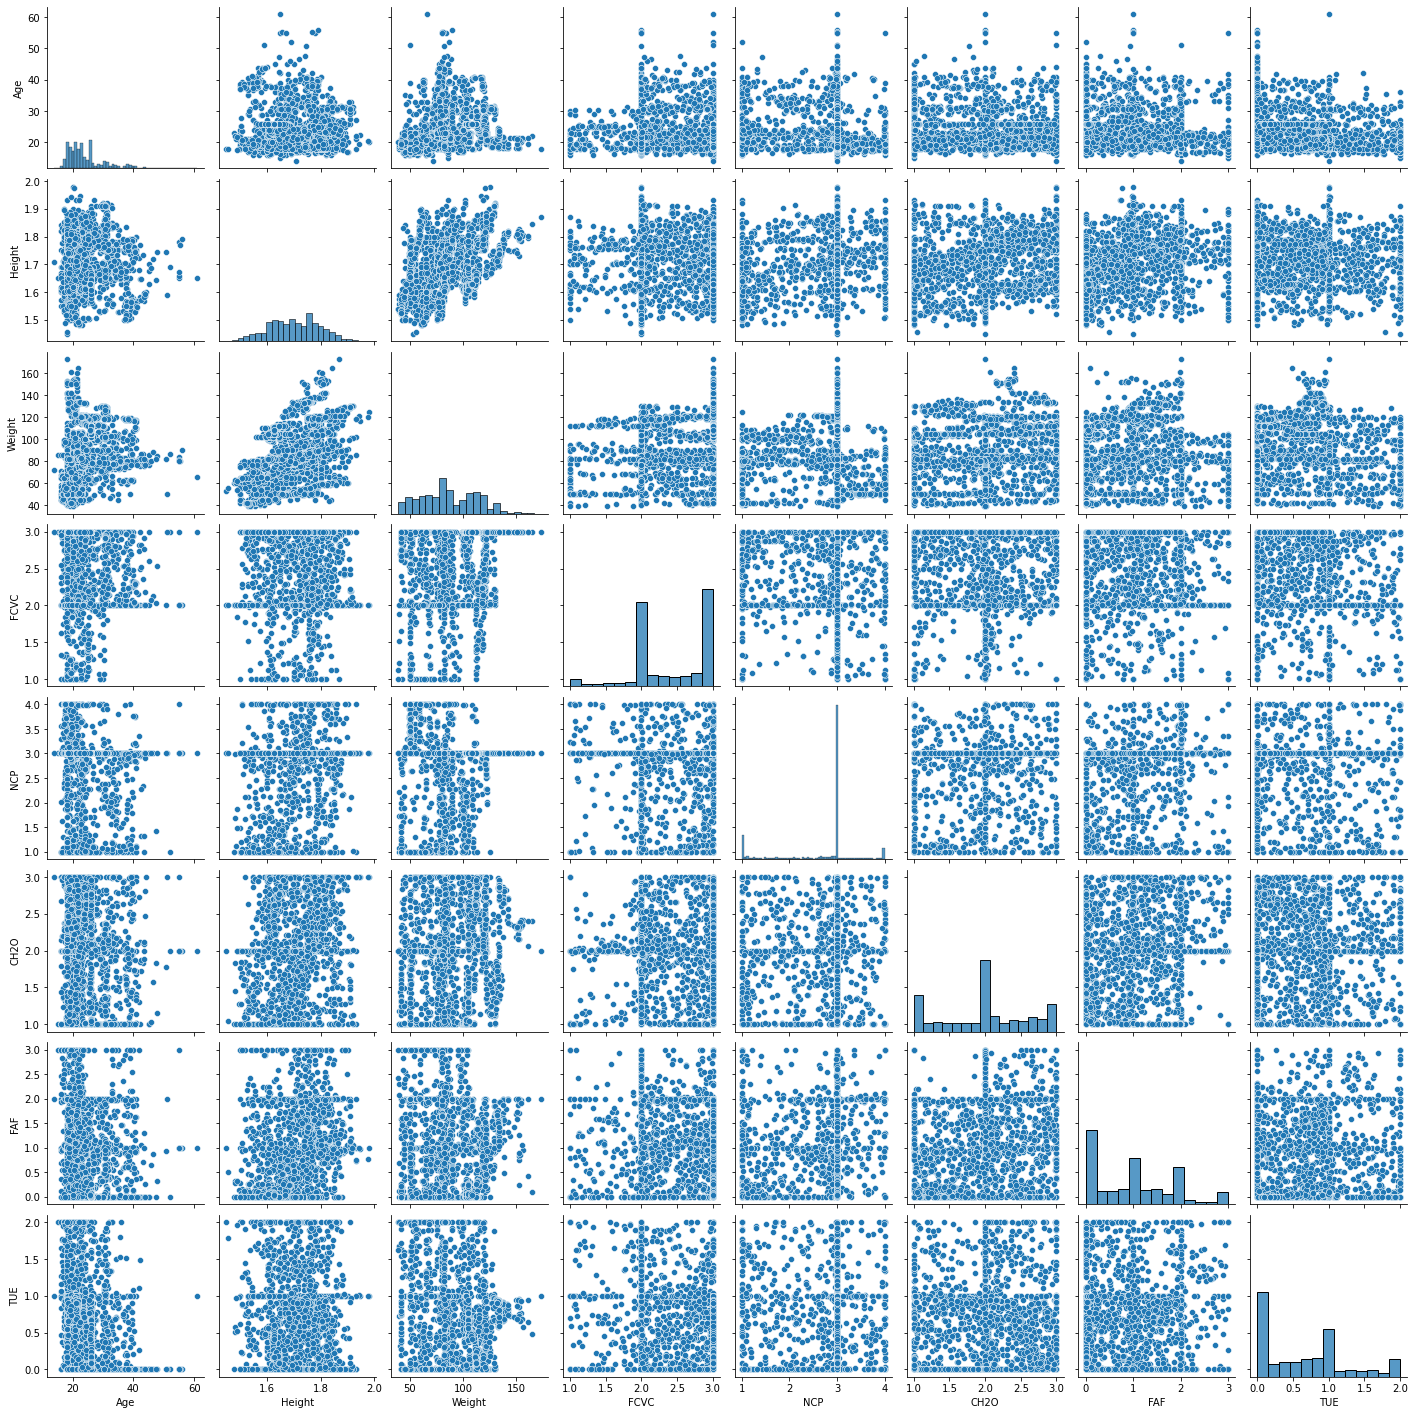

In [36]:
sns.pairplot(obesity_df);

Inference:
- There is no significant correlation between any of the features in the dataset.